# Introduction
This is an introductory tutorial to locate, load, and plot ESM4 biogeochemistry data.  

# Loading data
Output from the pre-industrial control simulation of ESM4 is located in the file directory:  
/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/  

NOTE: it is easiest to navigate the filesystem from the terminal, using the "ls" command.

Within this directory are a number of sub-folders in which different variables have been saved. Of relevance for our work are the folders with names starting ocean_ and ocean_cobalt_ (cobalt is the name of the biogeochemistry model used in this simulation). In each of the subfolders, data have been subsampled and time-averaged in different ways. So for example, in the sub-folder ocean_cobalt_omip_tracers_month_z, we find the further sub-folder ts/monthly/5yr/. In this folder are files (separate ones for each biogeochemical tracer) containing monthly averages for each 5 year time period since the beginning of the simulation.

Let's load and plot the data from one of these files.

In [4]:
# Load certain useful packages in python
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

We will load the oxygen (o2) data from a 5 year window of the simulation - years 711 to 715.

In [5]:
# Specify the location of the file
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
datadir = 'ocean_cobalt_omip_tracers_month_z/ts/monthly/5yr/'
filename = 'ocean_cobalt_omip_tracers_month_z.071101-071512.o2.nc'
# Note the timestamp in the filename: 071101-071512
# which specifies that in this file are data from year 0711 month 01 to year 0715 month 12.

In [6]:
# Load the file using the xarray (xr) command open_dataset
# We load the data to a variable that we call 'oxygen'
oxygen = xr.open_dataset(rootdir+datadir+filename)
# Print to the screen the details of the file
print(oxygen)

<xarray.Dataset>
Dimensions:     (nv: 2, time: 60, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0711-01-16 12:00:00 ... 0715-12-16 12:00:00
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Data variables:
    average_DT  (time) timedelta64[ns] ...
    average_T1  (time) object ...
    average_T2  (time) object ...
    o2          (time, z_l, yh, xh) float32 ...
    time_bnds   (time, nv) object ...
Attributes:
    filename:            ocean_cobalt_omip_tracers_month_z.071101-071512.o2.nc
    title:               ESM4_piControl_D
    associated_files:    areacello: 07110101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
  

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


We can see above that the file contains the variable (in this case oxygen -  o2), as well as all of the dimensional information - latitude (xh), longitude (yh), depth (z_i and z_l). The two depth coordinates correspond to the layer and interface depths - for our purposes, we will almost always be interested only in the layer depth.

We can learn more about a variable (e.g. what it is, and what its units are), by printing it to the screen directly.

In [7]:
print(oxygen.o2)

<xarray.DataArray 'o2' (time: 60, z_l: 35, yh: 576, xh: 720)>
[870912000 values with dtype=float32]
Coordinates:
  * time     (time) object 0711-01-16 12:00:00 ... 0715-12-16 12:00:00
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:      Dissolved Oxygen Concentration
    units:          mol m-3
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    cell_measures:  volume: volcello area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...


Here we can see that the variable o2 corresponds to the concetration of dissolved oxygen, in moles per cubic metre.

***

# Plotting

Now let's plot some of this data to see what it looks like.

We use the package pyplot from matplotlib (plt), with the command pcolormesh.  
This plots a 2D coloured mesh of whatever variable we specify.  
We load the generated image to the variable 'im', so that we can point to it later.

Within pcolormesh, we use the '.' to pull out the bits that we want from the dataset 'oxygen'  
In the first instance we take the variable o2:  
  oxygen.o2  
Then we select the first time point and the very upper depth level using index selection:  
  oxygen.o2.isel(time=0,z_l=0)

In [11]:
im = plt.pcolormesh(oxygen.o2.isel(time=0,z_l=0)) # pcolormesh of upper surface at first time step
plt.colorbar(im) # Plot a colorbar 
plt.show() # Show the plot

NameError: name 'plt' is not defined

***
We can just as easily plot a deeper depth level. Let's look at the 10th level.

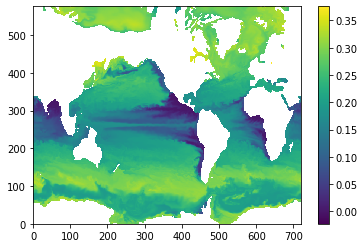

In [9]:
im = plt.pcolormesh(oxygen.o2.isel(time=0,z_l=9)) # remember python indices start from 0
plt.colorbar(im) # Plot a colorbar 
plt.show() # Show the plot

# Temperature and salinity data

Now we are equipped to load and examine biogeochemical data.

Where do we find the coincident physical variables, temperature and salinity? The physical variables are stored in the same root directory, but a different sub-directory: ocean_monthly_z/ts/monthly/5yr/.

Let's load the temperature data for the same time period.

In [10]:
datadir = 'ocean_monthly_z/ts/monthly/5yr/'
filename = 'ocean_monthly_z.071101-071512.thetao.nc'

temperature = xr.open_dataset(rootdir+datadir+filename)
print(temperature.thetao)

<xarray.DataArray 'thetao' (time: 60, z_l: 35, yh: 576, xh: 720)>
[870912000 values with dtype=float32]
Coordinates:
  * time     (time) object 0711-01-16 12:00:00 ... 0715-12-16 12:00:00
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:      Sea Water Potential Temperature
    units:          degC
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    cell_measures:  volume: volcello area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_potential_temperature


Let's plot the surface temperature data.

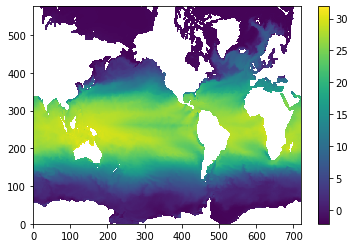

RuntimeError: You must first define an image, e.g., with imshow

<Figure size 432x288 with 0 Axes>

In [25]:
im = plt.pcolormesh(temperature.thetao.isel(time=0,z_l=0))
plt.colorbar(im) # Plot a colorbar 
plt.show() # Show the plot

# Binning

A lot of what we will be doing is looking at variables such as oxygen in a 'temperature coordinate'. That is to say, 'binning' the oxygen according to the temperature of the water.

Let's look at how to do that in xarray.

In [16]:
# Merge our oxygen and temperature dataarrays
ds = xr.merge([temperature,oxygen])
# Set temperature as a 'coordinate' in the new dataset
ds = ds.set_coords('thetao')
# Use the groupby_bins functionality of xarray to group the o2 measurements into temperature bins
theta_bins = np.arange(-2,30,1) # Specify the range of the bins
o2_in_theta = ds.o2.isel(time=5).groupby_bins('thetao',theta_bins) # Do the grouping

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


This series of operations has grouped the o2 datapoints according to their coincident temperature values.  
(A short example of the functionality of groupby using multi-dimensional coordinates, such as temperature, is provided [here](http://xarray.pydata.org/en/stable/examples/multidimensional-coords.html))  
We can now perform new operations on the grouped object (o2_in_theta).

For example, we can simply count up the number of data points in each group (like a histogram):

In [17]:
o2_in_theta.count(xr.ALL_DIMS)

<xarray.DataArray 'o2' (thetao_bins: 31)>
array([473074, 301840, 773846, 746644, 988101, 587632, 410546, 322267, 209297,
       183924, 179141, 169086, 148724, 140976, 126555, 125687, 110397,  93960,
        78576,  68609,  61491,  63245,  62657,  62143,  57121,  54572,  56465,
        61548,  68392,  69183,  71260])
Coordinates:
  * thetao_bins  (thetao_bins) object (-2, -1] (-1, 0] ... (27, 28] (28, 29]
    time         object 0711-06-16 00:00:00

And we can plot that very easily:

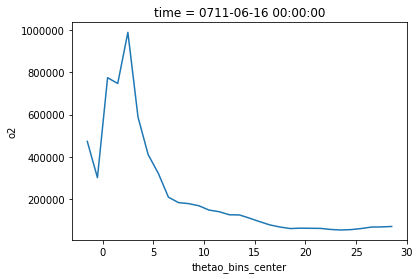

In [18]:
o2_in_theta.count(xr.ALL_DIMS).plot()

Or, we can take the mean value in each group:

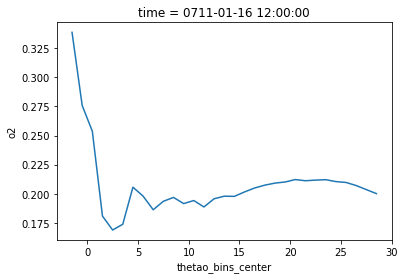

In [15]:
o2_in_theta.mean(xr.ALL_DIMS).plot()

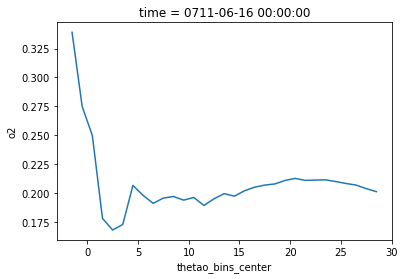

In [19]:
o2_in_theta.mean(xr.ALL_DIMS).plot()